<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/AT_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
%%capture
!pip install factor_analyzer

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [75]:
data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/bloco machine learning/tenis.csv"))
data.head()

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,28.8,2470.0,Male
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,25.9,2175.1,Male
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,24.7,2157.9,Male
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,25.6,2382.0,Male
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,18.5,2029.5,Male


In [125]:
OGdataM = data[data['Gender'] == 'Male' ]
OGdataF = data[data['Gender'] == 'Female' ]

In [77]:
print(OGdataM.info(), OGdataF.info())

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 386
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  387 non-null    object 
 1   Age                     387 non-null    float64
 2   Elo                     387 non-null    float64
 3   HardRaw                 387 non-null    object 
 4   ClayRaw                 387 non-null    object 
 5   GrassRaw                387 non-null    object 
 6   hard court elo rating   387 non-null    float64
 7   clay-court elo rating   387 non-null    float64
 8   grass-court elo rating  387 non-null    float64
 9   Peak Age                387 non-null    float64
 10  Peak Elo                387 non-null    float64
 11  Gender                  387 non-null    object 
dtypes: float64(7), object(5)
memory usage: 39.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 387 to 782
Data columns (total 12 columns):
 # 

In [78]:
# idx = data.isin(['-']).any(axis=1)
# print(data[idx])
# dataComHif = data.columns[data.isin(['-']).any()]


In [79]:
Gender = data["Gender"].replace(
    ["Male", "Female"], [0, 1]
)
dataNum = data.drop(columns="Player")
dataNum['Gender'] = Gender
feats = dataNum.columns.drop('Gender')
# print(feats)
dataNum

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender
0,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,28.8,2470.0,0
1,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,25.9,2175.1,0
2,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,24.7,2157.9,0
3,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,25.6,2382.0,0
4,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,18.5,2029.5,0
...,...,...,...,...,...,...,...,...,...,...,...
778,24.6,1112.5,1038.9,1070.2,1305.8,1075.7,1091.3,1209.2,18.5,1265.3,1
779,25.5,1094.4,926.2,1072.1,1153.7,1010.3,1083.3,1124.1,21.2,1228.7,1
780,24.2,1058.4,1028.8,1150.1,1245.3,1043.6,1104.3,1151.9,20.2,1196.3,1
781,20.4,1035.9,1227.6,972.5,-,1131.8,1004.2,1193.0,15.0,1169.0,1


In [80]:
# dataNumSemRaw = dataNum.drop(columns=["HardRaw", "ClayRaw", "GrassRaw"])

# dataNumSemRaw.head()

In [81]:
dataNumSemHif = dataNum.apply(pd.to_numeric, errors="coerce")
dataNumSemHif = dataNumSemHif.fillna(0)
dataNumSemHif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     783 non-null    float64
 1   Elo                     783 non-null    float64
 2   HardRaw                 783 non-null    float64
 3   ClayRaw                 783 non-null    float64
 4   GrassRaw                783 non-null    float64
 5   hard court elo rating   783 non-null    float64
 6   clay-court elo rating   783 non-null    float64
 7   grass-court elo rating  783 non-null    float64
 8   Peak Age                783 non-null    float64
 9   Peak Elo                783 non-null    float64
 10  Gender                  783 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 67.4 KB


In [82]:
from sklearn.preprocessing import StandardScaler
dataStd = dataNumSemHif.copy()

std_scaler = StandardScaler()
dataStd[feats] = std_scaler.fit_transform(dataStd[feats])
dataStd

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender
0,1.662110,3.190377,2.665538,2.760172,1.372208,3.182153,3.244502,3.919864,1.465816,3.840259,0
1,-0.159942,3.092862,2.784960,1.287081,0.998970,3.203485,2.363237,3.108269,0.639267,2.396579,0
2,-0.414181,2.965065,2.616107,2.676330,0.910348,3.038546,3.076695,2.846376,0.297247,2.312377,0
3,2.806188,2.460551,2.091173,1.460128,1.152356,2.470365,2.123042,2.995055,0.553762,3.409456,0
4,-1.727753,2.391264,1.958190,1.873490,0.518363,2.356417,2.318818,1.680815,-1.469856,1.683796,0
...,...,...,...,...,...,...,...,...,...,...,...
778,-0.435368,-2.315143,-1.836208,-1.851646,0.287263,-2.285810,-2.291509,-1.908619,-1.469856,-2.057338,1
779,-0.244688,-2.408039,-2.329208,-1.842384,0.028042,-2.626094,-2.335381,-2.489012,-0.700311,-2.236513,1
780,-0.520114,-2.592805,-1.880390,-1.462169,0.184154,-2.452830,-2.220218,-2.299413,-0.985328,-2.395127,1
781,-1.325207,-2.708284,-1.010749,-2.327890,-1.938186,-1.993915,-2.769158,-2.019105,-2.467415,-2.528774,1


In [83]:
dataStd.corr()

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender
Age,1.000000,0.169570,0.213227,0.177745,0.397634,0.200761,0.177470,0.185417,0.713467,0.401057,-0.164875
Elo,0.169570,1.000000,0.825755,0.776729,0.539662,0.979670,0.962302,0.928355,0.237038,0.891823,-0.078548
HardRaw,0.213227,0.825755,1.000000,0.549548,0.559894,0.883947,0.745531,0.769798,0.207624,0.776826,-0.008660
ClayRaw,0.177745,0.776729,0.549548,1.000000,0.443629,0.710841,0.886878,0.709587,0.200961,0.734294,-0.071893
GrassRaw,0.397634,0.539662,0.559894,0.443629,1.000000,0.567225,0.522281,0.526878,0.234398,0.636940,-0.042750
hard court elo rating,0.200761,0.979670,0.883947,0.710841,0.567225,1.000000,0.915662,0.915209,0.240868,0.895397,-0.065471
clay-court elo rating,0.177470,0.962302,0.745531,0.886878,0.522281,0.915662,1.000000,0.886774,0.232763,0.876624,-0.095371
grass-court elo rating,0.185417,0.928355,0.769798,0.709587,0.526878,0.915209,0.886774,1.000000,0.213484,0.859034,-0.129874
Peak Age,0.713467,0.237038,0.207624,0.200961,0.234398,0.240868,0.232763,0.213484,1.000000,0.274490,-0.211288
Peak Elo,0.401057,0.891823,0.776826,0.734294,0.636940,0.895397,0.876624,0.859034,0.274490,1.000000,-0.171503


Text(0.5, 1.0, 'Correlação sem colunas Std')

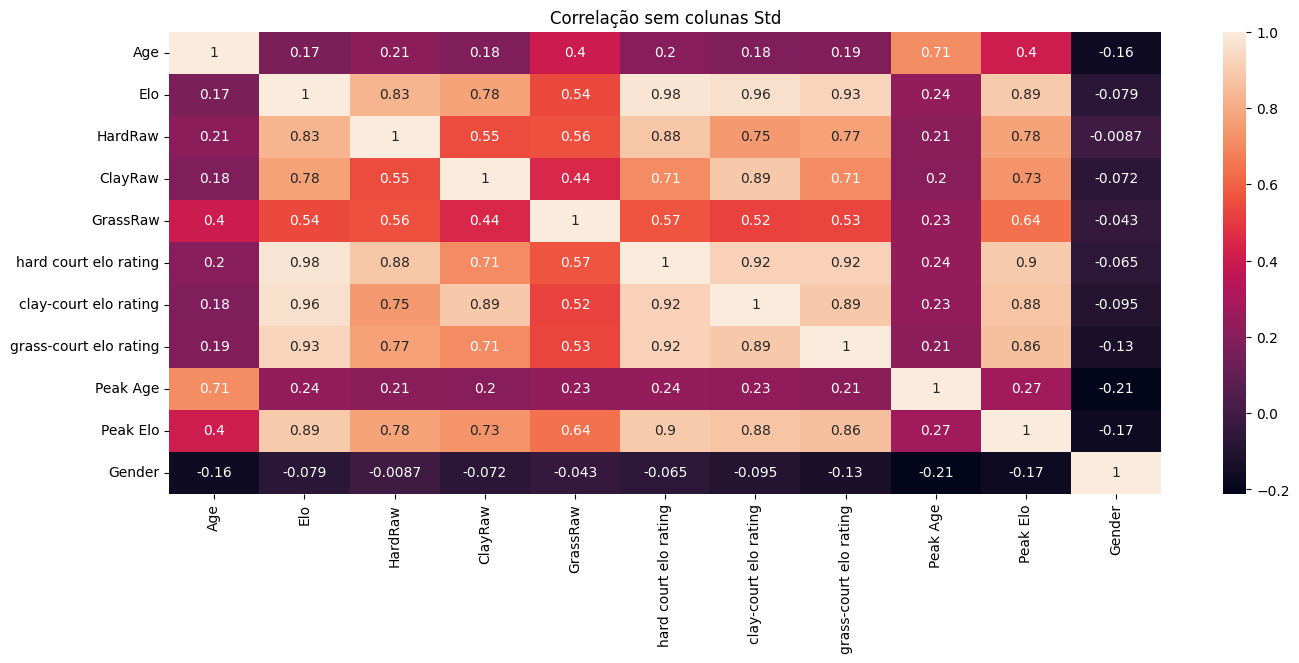

In [84]:
plt.figure(figsize=((16,6)))
corrDataStd = sns.heatmap(dataStd.corr(), annot=True)
corrDataStd.set_title('Correlação sem colunas Std')



In [85]:
dataM = dataStd[dataStd['Gender'] == 0 ]
dataM = dataM.drop(columns='Gender')
dataF = dataStd[dataStd['Gender'] == 1 ]
dataF = dataF.drop(columns='Gender')

In [86]:
dataM.corr()

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo
Age,1.000000,0.087236,0.175811,0.152076,0.417287,0.132399,0.110247,0.122136,0.715910,0.395080
Elo,0.087236,1.000000,0.745223,0.720425,0.484839,0.974719,0.959713,0.932728,0.180307,0.853814
HardRaw,0.175811,0.745223,1.000000,0.445581,0.534371,0.813358,0.664605,0.713979,0.168094,0.702317
ClayRaw,0.152076,0.720425,0.445581,1.000000,0.379136,0.649627,0.832931,0.648688,0.196879,0.676403
GrassRaw,0.417287,0.484839,0.534371,0.379136,1.000000,0.527114,0.460841,0.485638,0.286420,0.609875
hard court elo rating,0.132399,0.974719,0.813358,0.649627,0.527114,1.000000,0.904944,0.927029,0.190792,0.865075
clay-court elo rating,0.110247,0.959713,0.664605,0.832931,0.460841,0.904944,1.000000,0.878085,0.197653,0.842841
grass-court elo rating,0.122136,0.932728,0.713979,0.648688,0.485638,0.927029,0.878085,1.000000,0.160288,0.836331
Peak Age,0.715910,0.180307,0.168094,0.196879,0.286420,0.190792,0.197653,0.160288,1.000000,0.273803
Peak Elo,0.395080,0.853814,0.702317,0.676403,0.609875,0.865075,0.842841,0.836331,0.273803,1.000000


In [87]:
dataF.corr()

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo
Age,1.000000,0.228879,0.265430,0.189792,0.375055,0.251313,0.218539,0.210542,0.694918,0.374533
Elo,0.228879,1.000000,0.936760,0.848271,0.588002,0.983804,0.964385,0.926172,0.265243,0.928226
HardRaw,0.265430,0.936760,1.000000,0.701188,0.597374,0.984320,0.856724,0.861759,0.262399,0.898037
ClayRaw,0.189792,0.848271,0.701188,1.000000,0.519700,0.786676,0.958130,0.785838,0.186716,0.810760
GrassRaw,0.375055,0.588002,0.597374,0.519700,1.000000,0.602306,0.577490,0.563358,0.180182,0.667584
hard court elo rating,0.251313,0.983804,0.984320,0.786676,0.602306,1.000000,0.924861,0.908174,0.268087,0.927796
clay-court elo rating,0.218539,0.964385,0.856724,0.958130,0.577490,0.924861,1.000000,0.893286,0.236668,0.906839
grass-court elo rating,0.210542,0.926172,0.861759,0.785838,0.563358,0.908174,0.893286,1.000000,0.217784,0.873002
Peak Age,0.694918,0.265243,0.262399,0.186716,0.180182,0.268087,0.236668,0.217784,1.000000,0.225300
Peak Elo,0.374533,0.928226,0.898037,0.810760,0.667584,0.927796,0.906839,0.873002,0.225300,1.000000


Text(0.5, 1.0, 'Correlação Female')

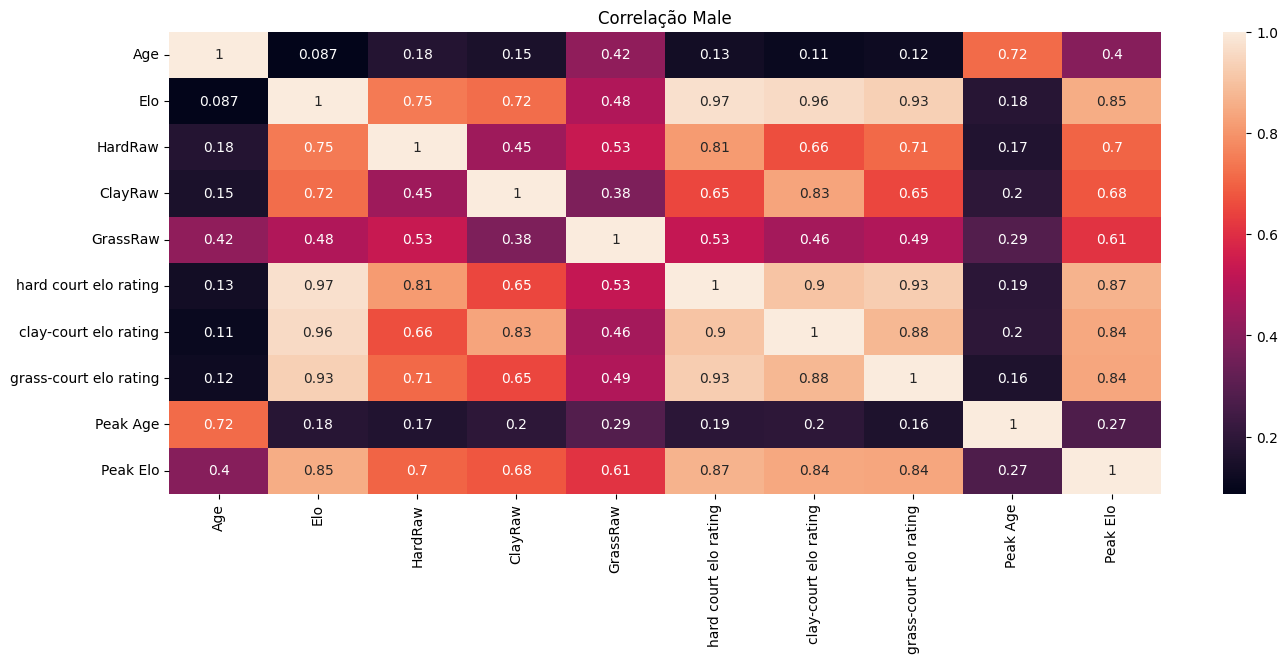

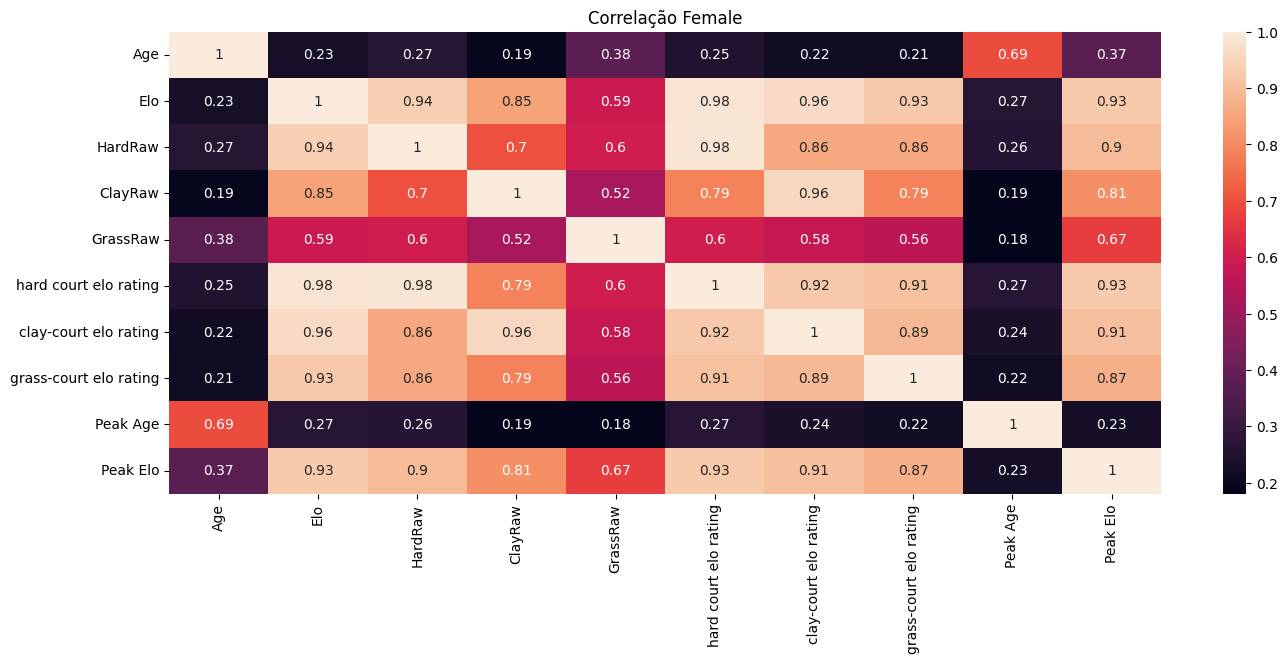

In [88]:
plt.figure(figsize=((16,6)))
corrDataM = sns.heatmap(dataM.corr(), annot=True)
corrDataM.set_title('Correlação Male')
plt.figure(figsize=((16,6)))
corrDataF = sns.heatmap(dataF.corr(), annot=True)
corrDataF.set_title('Correlação Female')


In [89]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmoVarM , kmoM = calculate_kmo(dataM)
kmoVarF , kmoF = calculate_kmo(dataF)

print(f'kmo Male: {kmoM}\n\nkmo Female: {kmoF}')

kmo Male: 0.8320288733804349

kmo Female: 0.8002770168717989


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



In [90]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

quiQuadM, pvalorM = calculate_bartlett_sphericity(dataM)
quiQuadF, pvalorF = calculate_bartlett_sphericity(dataF)

print(f'pvalor Male: {pvalorM}\n\npvalor Female: {pvalorF}')

pvalor Male: 0.0

pvalor Female: 0.0


In [91]:
from sklearn.decomposition import PCA

nFatoresM = dataM.shape[1]
nFatoresF = dataF.shape[1]

pcaM = PCA(n_components=nFatoresM)
pcaF = PCA(n_components=nFatoresF)

pcaM.fit(dataM)
pcaF.fit(dataF)

PCA(n_components=10)

In [92]:
print(f'variancia PCA Male: \n{pcaM.explained_variance_ratio_}\n\nvariancia PCA Female: \n{pcaF.explained_variance_ratio_}')

variancia PCA Male: 
[0.61782049 0.16942241 0.07950478 0.05386075 0.03034997 0.02871917
 0.00914219 0.00689203 0.00355159 0.00073664]

variancia PCA Female: 
[7.00532022e-01 1.51680960e-01 6.42083873e-02 3.35348651e-02
 2.73614074e-02 1.46422680e-02 5.58700865e-03 2.45307755e-03
 2.32306878e-09 1.96337337e-09]


In [93]:
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'colab'

In [94]:
fatoresM = [f'F{i + 1}' for i in range(nFatoresM)]
fatoresF = [f'F{i + 1}' for i in range(nFatoresF)]

figM = px.bar(x= fatoresM, y= pcaM.explained_variance_ratio_, text= np.around( pcaM.explained_variance_ratio_, decimals=2),
               title="ScreenPlot Male")
figM.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figM.show()
figF = px.bar(x= fatoresF, y= pcaF.explained_variance_ratio_, text= np.around( pcaF.explained_variance_ratio_, decimals=2),
               title="ScreenPlot Female")
figF.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figF.show()

In [95]:
varAcumM = [sum(pcaM.explained_variance_ratio_[0:i+1]) for i in range(nFatoresM)]
varAcumF = [sum(pcaF.explained_variance_ratio_[0:i+1]) for i in range(nFatoresF)]

print(f'variancia acumulada PCA Male: \n{varAcumM}\n\nvariancia acumulada PCA Female: \n{varAcumF}')

variancia acumulada PCA Male: 
[0.6178204896140933, 0.7872429009433111, 0.8667476816522225, 0.9206084276721729, 0.9509583945782585, 0.9796775604510145, 0.988819751237732, 0.9957117793479746, 0.9992633644530436, 1.0000000000000002]

variancia acumulada PCA Female: 
[0.7005320217875313, 0.8522129817003237, 0.9164213689709875, 0.9499562341097265, 0.9773176415380436, 0.9919599095113717, 0.9975469181596195, 0.9999999957135579, 0.9999999980366266, 1.0]


In [96]:
figAcumM = px.bar(x= fatoresM, y= varAcumM, text= np.around( varAcumM, decimals=2),
               title="ScreenPlot variancia acumulada Male")
figAcumM.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figAcumM.show()
figAcumF = px.bar(x= fatoresF, y= varAcumF, text= np.around( varAcumF, decimals=2),
               title="ScreenPlot variancia acumulada Female")
figAcumF.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figAcumF.show()

In [97]:
autovaloresM = pcaM.explained_variance_ratio_ * nFatoresM
autovaloresF = pcaF.explained_variance_ratio_ * nFatoresF
print(f'autovalores Male: \n{autovaloresM}\n\nautovalores Female: \n{autovaloresF}')

autovalores Male: 
[6.1782049  1.69422411 0.79504781 0.53860746 0.30349967 0.28719166
 0.09142191 0.06892028 0.03551585 0.00736636]

autovalores Female: 
[7.00532022e+00 1.51680960e+00 6.42083873e-01 3.35348651e-01
 2.73614074e-01 1.46422680e-01 5.58700865e-02 2.45307755e-02
 2.32306878e-08 1.96337337e-08]


In [106]:
fatoresSelM = [1 if autovalor > 1 else 0 for autovalor in autovaloresM]
fatoresSelF = [1 if autovalor > 1 else 0 for autovalor in autovaloresF]

print(f'fatores selecionados Male: \n{fatoresSelM}\n\nfatores selecionados Female: \n{fatoresSelF}')


fatores selecionados Male: 
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

fatores selecionados Female: 
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [99]:
resumoM = pd.DataFrame({
    'Fator': fatoresM,
    'Autovalor': autovaloresM,
    'Variancia Explicada': pcaM.explained_variance_ratio_,
    "Variancia acumlada": varAcumM
    })
resumoM

,Fator,Autovalor,Variancia Explicada,Variancia acumlada
0,F1,6.178205,0.617820,0.617820
1,F2,1.694224,0.169422,0.787243
2,F3,0.795048,0.079505,0.866748
3,F4,0.538607,0.053861,0.920608
4,F5,0.303500,0.030350,0.950958
5,F6,0.287192,0.028719,0.979678
6,F7,0.091422,0.009142,0.988820
7,F8,0.068920,0.006892,0.995712
8,F9,0.035516,0.003552,0.999263
9,F10,0.007366,0.000737,1.000000


In [100]:
resumoF = pd.DataFrame({
    'Fator': fatoresF,
    'Autovalor': autovaloresF,
    'Variancia Explicada': pcaF.explained_variance_ratio_,
    "Variancia acumlada": varAcumF
    })
resumoF

,Fator,Autovalor,Variancia Explicada,Variancia acumlada
0,F1,7.005320e+00,7.005320e-01,0.700532
1,F2,1.516810e+00,1.516810e-01,0.852213
2,F3,6.420839e-01,6.420839e-02,0.916421
3,F4,3.353487e-01,3.353487e-02,0.949956
4,F5,2.736141e-01,2.736141e-02,0.977318
5,F6,1.464227e-01,1.464227e-02,0.991960
6,F7,5.587009e-02,5.587009e-03,0.997547
7,F8,2.453078e-02,2.453078e-03,1.000000
8,F9,2.323069e-08,2.323069e-09,1.000000
9,F10,1.963373e-08,1.963373e-09,1.000000


In [101]:
pd.DataFrame(pcaM.components_, columns=dataM.columns, index = [f'Autovetor {i + 1}' for i in range(nFatoresM)])

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo
Autovetor 1,0.120857,0.371706,0.361365,0.340178,0.260283,0.370099,0.369626,0.346591,0.117828,0.354358
Autovetor 2,0.706409,-0.155455,-0.048851,-0.086288,0.263665,-0.119186,-0.140897,-0.128391,0.585579,0.063435
Autovetor 3,-0.046066,-0.048017,0.529121,-0.624815,0.446725,0.096785,-0.239397,0.015592,-0.242036,0.012034
Autovetor 4,0.020599,0.139318,0.324120,-0.376334,-0.725803,0.187089,0.003942,0.140102,0.386144,-0.054240
Autovetor 5,0.260106,0.148261,-0.578435,-0.439789,-0.073079,0.136198,0.038276,0.346537,-0.284450,0.394978
Autovetor 6,-0.495955,0.190369,-0.349188,-0.243894,0.359724,0.120941,0.099001,0.159533,0.534213,-0.267784
Autovetor 7,-0.240349,0.070156,-0.029346,-0.158212,-0.021498,0.045662,0.207859,-0.707573,0.132808,0.589379
Autovetor 8,0.334941,0.359102,-0.062766,-0.142227,0.030238,0.235594,0.424294,-0.395958,-0.226974,-0.538468
Autovetor 9,-0.005516,-0.095645,0.139167,-0.211005,0.016117,-0.696249,0.635029,0.195157,0.005909,0.022956
Autovetor 10,0.014945,0.784033,0.036322,0.046164,0.001725,-0.478460,-0.385279,-0.049502,-0.006320,0.041974


In [102]:
pd.DataFrame(pcaF.components_, columns=dataF.columns, index = [f'Autovetor {i + 1}' for i in range(nFatoresF)])

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo
Autovetor 1,1.297606e-01,0.384097,0.317520,0.297951,0.260240,0.383525,0.372800,0.369943,0.124962,0.373856
Autovetor 2,6.686889e-01,-0.091909,-0.043661,-0.107058,0.095742,-0.072548,-0.109332,-0.111055,0.701282,-0.022973
Autovetor 3,1.887412e-01,-0.143815,-0.041883,-0.118081,0.852082,-0.097831,-0.143275,-0.117056,-0.383304,0.105973
Autovetor 4,-1.016702e-01,0.091443,0.459713,-0.720573,-0.033390,0.319745,-0.356460,0.135365,0.032068,0.031188
Autovetor 5,6.207739e-01,-0.043786,0.037156,-0.035933,-0.440722,-0.000062,-0.043591,-0.000096,-0.535816,0.356112
Autovetor 6,-6.899718e-02,0.085329,0.316242,0.111441,-0.023156,0.231370,0.108249,-0.890972,0.020631,0.124451
Autovetor 7,-3.021176e-01,-0.047575,-0.296680,-0.149445,-0.026220,-0.200551,-0.109464,-0.048610,0.225834,0.830575
Autovetor 8,9.306671e-02,0.717222,-0.518420,-0.356731,0.022149,0.055280,0.182545,-0.150300,-0.078183,-0.123864
Autovetor 9,-6.351723e-07,0.454159,0.048891,0.434247,-0.000022,-0.082241,-0.772020,0.000012,-0.000005,0.000008
Autovetor 10,-1.718411e-05,-0.287833,-0.472891,0.121341,0.000024,0.795151,-0.215725,0.000040,0.000006,-0.000008


In [103]:
raizAutoM = np.sqrt(autovaloresM)
raizAutoF = np.sqrt(autovaloresF)

print(f'raiz autovalores Male: \n{raizAutoM}\n\nraiz autovalores Female: \n{raizAutoF}')

raiz autovalores Male: 
[2.4855995  1.30162365 0.89165453 0.73389881 0.55090804 0.53590266
 0.30236056 0.26252672 0.1884565  0.08582748]

raiz autovalores Female: 
[2.64675655e+00 1.23158824e+00 8.01301362e-01 5.79092956e-01
 5.23081327e-01 3.82652165e-01 2.36368540e-01 1.56623036e-01
 1.52416166e-04 1.40120426e-04]


In [105]:
figRootM = px.bar(x= fatoresM, y= raizAutoM, text= np.around( raizAutoM, decimals=2),
               title="ScreenPlot raízes latentes Male")
figRootM.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figRootM.show()
figRootF = px.bar(x= fatoresF, y= raizAutoF, text= np.around( raizAutoF, decimals=2),
               title="ScreenPlot raízes latentes Female")
figRootF.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
figRootF.show()

In [110]:
cargaFactM = pd.DataFrame(pcaM.components_.T * raizAutoM, columns= fatoresM, index=dataM.columns)
cargaFactM

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
Age,0.300403,0.919479,-0.041075,0.015117,0.143294,-0.265784,-0.072672,0.087931,-0.001039,0.001283
Elo,0.923911,-0.202344,-0.042814,0.102245,0.081678,0.102019,0.021212,0.094274,-0.018025,0.067292
HardRaw,0.898209,-0.063586,0.471793,0.237871,-0.318664,-0.187131,-0.008873,-0.016478,0.026227,0.003117
ClayRaw,0.845545,-0.112315,-0.557119,-0.276191,-0.242283,-0.130704,-0.047837,-0.037338,-0.039765,0.003962
GrassRaw,0.646960,0.343192,0.398324,-0.532666,-0.040260,0.192777,-0.006500,0.007938,0.003037,0.000148
hard court elo rating,0.919917,-0.155135,0.086299,0.137304,0.075033,0.064813,0.013806,0.061850,-0.131213,-0.041065
clay-court elo rating,0.918743,-0.183395,-0.213459,0.002893,0.021087,0.053055,0.062849,0.111389,0.119675,-0.033067
grass-court elo rating,0.861487,-0.167117,0.013903,0.102821,0.190910,0.085494,-0.213942,-0.103950,0.036779,-0.004249
Peak Age,0.292874,0.762204,-0.215812,0.283391,-0.156706,0.286286,0.040156,-0.059587,0.001114,-0.000542
Peak Elo,0.880793,0.082569,0.010730,-0.039807,0.217596,-0.143506,0.178205,-0.141362,0.004326,0.003603


In [108]:
cargaFactF = pd.DataFrame(pcaF.components_.T * raizAutoF, columns= fatoresF, index=dataF.columns)
cargaFactF

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
Age,0.343445,0.823549,0.151239,-0.058876,0.324715,-0.026402,-0.071411,0.014576,-9.681053e-11,-2.407845e-09
Elo,1.016611,-0.113194,-0.115239,0.052954,-0.022904,0.032651,-0.011245,0.112334,6.922117e-05,-4.033125e-05
HardRaw,0.840399,-0.053772,-0.033561,0.266216,0.019435,0.121011,-0.070126,-0.081197,7.451786e-06,-6.626174e-05
ClayRaw,0.788605,-0.131852,-0.094619,-0.417279,-0.018796,0.042643,-0.035324,-0.055872,6.618621e-05,1.700229e-05
GrassRaw,0.688792,0.117914,0.682774,-0.019336,-0.230533,-0.008861,-0.006198,0.003469,-3.410454e-09,3.331687e-09
hard court elo rating,1.015098,-0.089349,-0.078392,0.185162,-0.000032,0.088534,-0.047404,0.008658,-1.253480e-05,1.114169e-04
clay-court elo rating,0.986710,-0.134652,-0.114807,-0.206423,-0.022802,0.041422,-0.025874,0.028591,-1.176684e-04,-3.022745e-05
grass-court elo rating,0.979148,-0.136774,-0.093797,0.078389,-0.000050,-0.340932,-0.011490,-0.023540,1.779978e-09,5.565769e-09
Peak Age,0.330744,0.863690,-0.307142,0.018571,-0.280275,0.007894,0.053380,-0.012245,-6.975080e-10,7.763156e-10
Peak Elo,0.989507,-0.028294,0.084917,0.018061,0.186276,0.047621,0.196322,-0.019400,1.226454e-09,-1.134006e-09


In [113]:
scoreFactM = np.zeros(pcaM.components_.shape)
for i in range(len(pcaM.components_)):
    scoreFactM[i] = pcaM.components_[i] / raizAutoM[i]
scoreFactM

array([[ 4.86229959e-02,  1.49543634e-01,  1.45383540e-01,
         1.36859413e-01,  1.04716524e-01,  1.48897123e-01,
         1.48707033e-01,  1.39439652e-01,  4.74044457e-02,
         1.42564592e-01],
       [ 5.42713945e-01, -1.19431608e-01, -3.75310012e-02,
        -6.62927193e-02,  2.02566076e-01, -9.15672173e-02,
        -1.08247131e-01, -9.86391400e-02,  4.49883556e-01,
         4.87354344e-02],
       [-5.16630129e-02, -5.38514285e-02,  5.93414580e-01,
        -7.00736115e-01,  5.01006314e-01,  1.08545678e-01,
        -2.68486057e-01,  1.74867527e-02, -2.71445738e-01,
         1.34966457e-02],
       [ 2.80676115e-02,  1.89832080e-01,  4.41640727e-01,
        -5.12787766e-01, -9.88968411e-01,  2.54924464e-01,
         5.37112931e-03,  1.90901296e-01,  5.26154399e-01,
        -7.39071824e-02],
       [ 4.72139631e-01,  2.69120704e-01, -1.04996609e+00,
        -7.98298477e-01, -1.32651680e-01,  2.47224898e-01,
         6.94787773e-02,  6.29029079e-01, -5.16329052e-01,
         7.

In [114]:
scoreFactF = np.zeros(pcaF.components_.shape)
for i in range(len(pcaF.components_)):
    scoreFactF[i] = pcaF.components_[i] / raizAutoF[i]
scoreFactF

array([[ 4.90262724e-02,  1.45119888e-01,  1.19965797e-01,
         1.12572231e-01,  9.83241387e-02,  1.44903842e-01,
         1.40851456e-01,  1.39772119e-01,  4.72132214e-02,
         1.41250722e-01],
       [ 5.42948424e-01, -7.46262635e-02, -3.54507521e-02,
        -8.69269843e-02,  7.77383937e-02, -5.89060994e-02,
        -8.87730112e-02, -9.01721230e-02,  5.69412506e-01,
        -1.86535165e-02],
       [ 2.35543314e-01, -1.79476962e-01, -5.22688347e-02,
        -1.47361896e-01,  1.06337272e+00, -1.22089773e-01,
        -1.78803053e-01, -1.46081942e-01, -4.78351674e-01,
         1.32251663e-01],
       [-1.75567968e-01,  1.57907467e-01,  7.93849629e-01,
        -1.24431306e+00, -5.76583215e-02,  5.52148163e-01,
        -6.15548704e-01,  2.33753398e-01,  5.53768621e-02,
         5.38562938e-02],
       [ 1.18676362e+00, -8.37081993e-02,  7.10320358e-02,
        -6.86949518e-02, -8.42549393e-01, -1.18117070e-04,
        -8.33353204e-02, -1.83212069e-04, -1.02434575e+00,
         6.

In [115]:
F1M = np.zeros(dataM.shape[0])
for indice, variavel in enumerate(pcaM.feature_names_in_):
    F1M += scoreFactM[0][indice] * dataM[variavel]
F1M

0      3.586740
1      2.774193
2      2.915825
3      2.742419
4      1.969397
         ...   
382   -1.604934
383   -1.691966
384   -1.517091
385   -2.055064
386   -2.418289
Name: Age, Length: 387, dtype: float64

In [117]:
F2M = np.zeros(dataM.shape[0])
for indice, variavel in enumerate(pcaM.feature_names_in_):
    F2M += scoreFactM[1][indice] * dataM[variavel]
F2M

0      0.333323
1     -0.895028
2     -1.315722
3      0.951081
4     -2.527731
         ...   
382    0.677201
383   -0.812015
384    1.861054
385    0.576520
386   -0.588136
Name: Age, Length: 387, dtype: float64

In [118]:
F1F = np.zeros(dataF.shape[0])
for indice, variavel in enumerate(pcaF.feature_names_in_):
    F1F += scoreFactF[0][indice] * dataF[variavel]
F1F

387    2.688748
388    2.007838
389    2.418603
390    1.980826
391    1.952567
         ...   
778   -2.038553
779   -2.251860
780   -2.148215
781   -2.466744
782   -2.314072
Name: Age, Length: 396, dtype: float64

In [119]:
F2F = np.zeros(dataF.shape[0])
for indice, variavel in enumerate(pcaF.feature_names_in_):
    F2F += scoreFactF[1][indice] * dataF[variavel]
F2F

387   -1.065655
388   -1.202124
389   -0.109089
390   -0.569559
391   -1.318988
         ...   
778   -0.103629
779    0.521159
780    0.151720
781   -1.242352
782    0.418738
Name: Age, Length: 396, dtype: float64

In [129]:
OGdataM['F1'] = F1M
OGdataM['F2'] = F2M

OGdataF['F1'] = F1F
OGdataF['F2'] = F2F
OGdataM.head()

<ipython-input-129-160697b5f961>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-160697b5f961>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-160697b5f961>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-160

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender,F1,F2,Rankings
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,28.8,2470.0,Male,3.586740,0.333323,2.272434
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,25.9,2175.1,Male,2.774193,-0.895028,1.562316
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,24.7,2157.9,Male,2.915825,-1.315722,1.578543
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,25.6,2382.0,Male,2.742419,0.951081,1.855457
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,18.5,2029.5,Male,1.969397,-2.527731,0.788479


In [130]:
OGdataM['Rankings'] = (
    OGdataM['F1'] * pcaM.explained_variance_ratio_[0] +
    OGdataM['F2'] * pcaM.explained_variance_ratio_[1]
    )
OGdataM.head()

<ipython-input-130-9034c888fc85>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender,F1,F2,Rankings
0,Novak Djokovic,34.5,2185.2,2068,2016.3,1942.4,2126.6,2100.8,2063.8,28.8,2470.0,Male,3.586740,0.333323,2.272434
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,25.9,2175.1,Male,2.774193,-0.895028,1.562316
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,24.7,2157.9,Male,2.915825,-1.315722,1.578543
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,25.6,2382.0,Male,2.742419,0.951081,1.855457
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,18.5,2029.5,Male,1.969397,-2.527731,0.788479


In [131]:
OGdataF['Rankings'] = (
    OGdataF['F1'] * pcaF.explained_variance_ratio_[0] +
    OGdataF['F2'] * pcaF.explained_variance_ratio_[1]
    )
OGdataF.head()

<ipython-input-131-64fbbf48f049>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard court elo rating,clay-court elo rating,grass-court elo rating,Peak Age,Peak Elo,Gender,F1,F2,Rankings
387,Ashleigh Barty,25.3,2132.0,1994.1,1929,1817.9,2063.0,2030.5,1975.0,25.3,2148.9,Female,2.688748,-1.065655,1.721914
388,Naomi Osaka,23.9,2038.9,1986.8,1661.1,1546.2,2012.9,1850.0,1792.5,23.4,2114.3,Female,2.007838,-1.202124,1.224216
389,Simona Halep,30.1,2033.4,1910.2,1934.6,1757.4,1971.8,1984.0,1895.4,26.9,2096.2,Female,2.418603,-0.109089,1.677762
390,Anett Kontaveit,25.9,2010.6,1934.3,1743.7,1571.7,1972.5,1877.2,1791.2,25.9,2010.6,Female,1.980826,-0.569559,1.301241
391,Aryna Sabalenka,23.5,1990.5,1880.7,1771.7,1677.6,1935.6,1881.1,1834.1,23.0,2053.4,Female,1.952567,-1.318988,1.167771
